## HW1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# read dataset
df = pd.read_csv("Hitters.csv")

In [3]:
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [4]:
# check missing values
na_percent = df.isnull().sum()/ len(df)
print(na_percent)

Unnamed: 0    0.00000
AtBat         0.00000
Hits          0.00000
HmRun         0.00000
Runs          0.00000
RBI           0.00000
Walks         0.00000
Years         0.00000
CAtBat        0.00000
CHits         0.00000
CHmRun        0.00000
CRuns         0.00000
CRBI          0.00000
CWalks        0.00000
League        0.00000
Division      0.00000
PutOuts       0.00000
Assists       0.00000
Errors        0.00000
Salary        0.18323
NewLeague     0.00000
dtype: float64


In [5]:
# the percentage of missing values is low thus drop missing values
df = df.dropna()

In [6]:
# set features and target variables
scaler = StandardScaler()
Y = df.Salary
X = scaler.fit_transform(df.drop(['Salary', 'League', 'Division', 'NewLeague', 'Unnamed: 0'], axis = 1).values)
features = list(df.drop(['Salary', 'League', 'Division', 'NewLeague', 'Unnamed: 0'], axis = 1).columns)

## 1.1

Text(0.5, 1.0, 'Lasso')

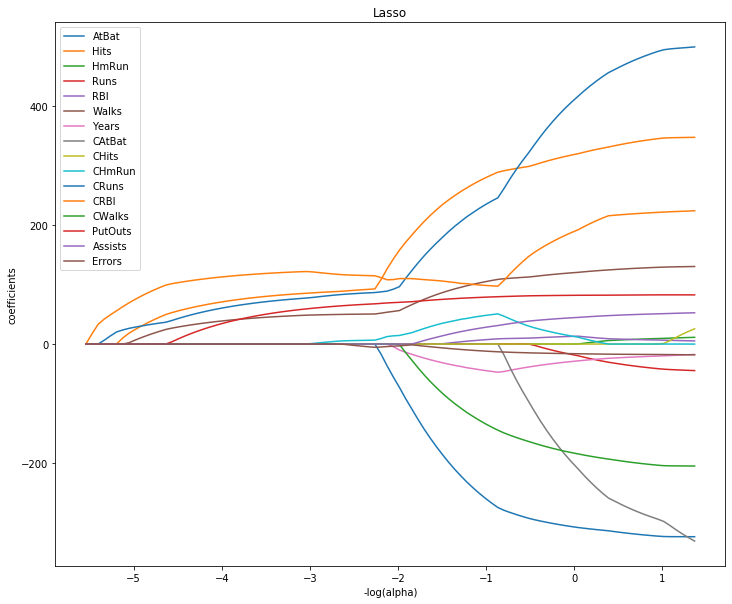

In [7]:
# Lasso
lasso_alphas, lasso_coefs,_ = linear_model.lasso_path(X, Y)
log_lasso_alphas = -np.log(lasso_alphas)

plt.figure(1, figsize = (12, 10))
for coef, l in zip(lasso_coefs, features):
    feat1 = plt.plot(log_lasso_alphas, coef, label=l )

plt.xlabel('-log(alpha)')
plt.ylabel('coefficients')
plt.legend()
plt.title('Lasso')

Based on the plot, final three features remained in the model are: CRBI, AtBat, Hits.

In [8]:
# cross-validation
lasso_model = linear_model.LassoCV().fit(X,Y)
selected_features = []
for i in range(len(lasso_model.coef_)):
    if lasso_model.coef_[i] != 0:
        selected_features.append(features[i])
        
print("Optimal value of the regularization penalty:",lasso_model.alpha_)
print(len(selected_features),"features left in that model")
print("They are", selected_features)

Optimal value of the regularization penalty: 1.9311154418875123
13 features left in that model
They are ['AtBat', 'Hits', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']


## 1.2

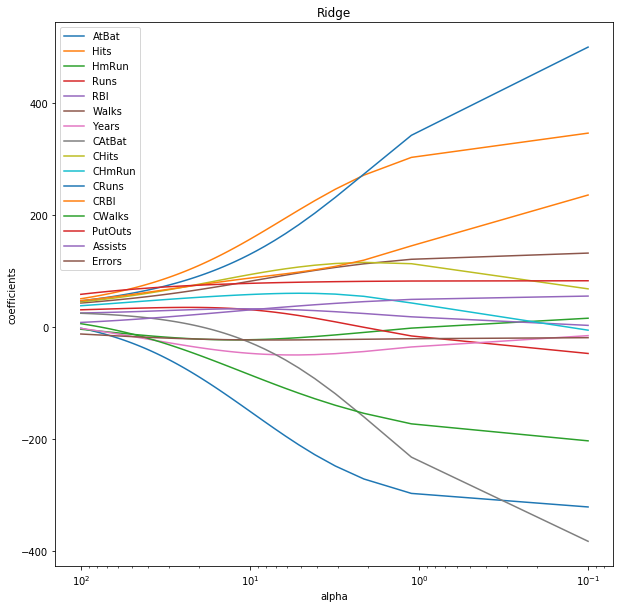

In [11]:
# Ridge regression
alphas = np.linspace(0.1, 100, 100)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)
    
plt.figure(2,figsize=(10,10))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge')
plt.legend(features)
plt.show()

In [15]:
# Cross-validation
ridge_model = linear_model.RidgeCV(alphas).fit(X,Y)
selected_features = []
for i in range(len(ridge_model.coef_)):
    if ridge_model.coef_[i] >= 0:
        selected_features.append(features[i])

print("Optimal value of the regularization penalty:", ridge_model.alpha_)
print(len(selected_features),"features are selected in the model")

Optimal value of the regularization penalty: 3.1272727272727274
10 features are selected in the model


## 2

The bias-variance trade-off is that bias is reduced and variance is increased; bias is increased and variance is decreased. 

Regularization can tackle high variance and let the model trade between bias and variance. Thus, the model will be smoother and work well on other similar test data.

Referring to the part(1), we can see that when the alpha increases, more features are elminated and bias is higher.